In [1]:
!pip install --quiet gdown


file_id = "1CSkQOyYbQ0aHf67ETLJ58Gp5RlnPkSxZ"
url = f"https://drive.google.com/uc?id={file_id}"

!gdown --quiet $url -O si.lammps-dump-text

file_id = "1JCFXgqru7S-DCJIZO2Xvar87Tdgfx3qZ"
url = f"https://drive.google.com/uc?id={file_id}"

!gdown --quiet $url -O si_solid.lammps-dump-text

In [6]:
!pip install ase numpy matplotlib
from ase.io import read
from ase.visualize.plot import plot_atoms
import matplotlib.pyplot as plt

In [3]:
# ----------- File paths -----------
file_liquid = "si.lammps-dump-text"
file_solid  = "si_solid.lammps-dump-text"

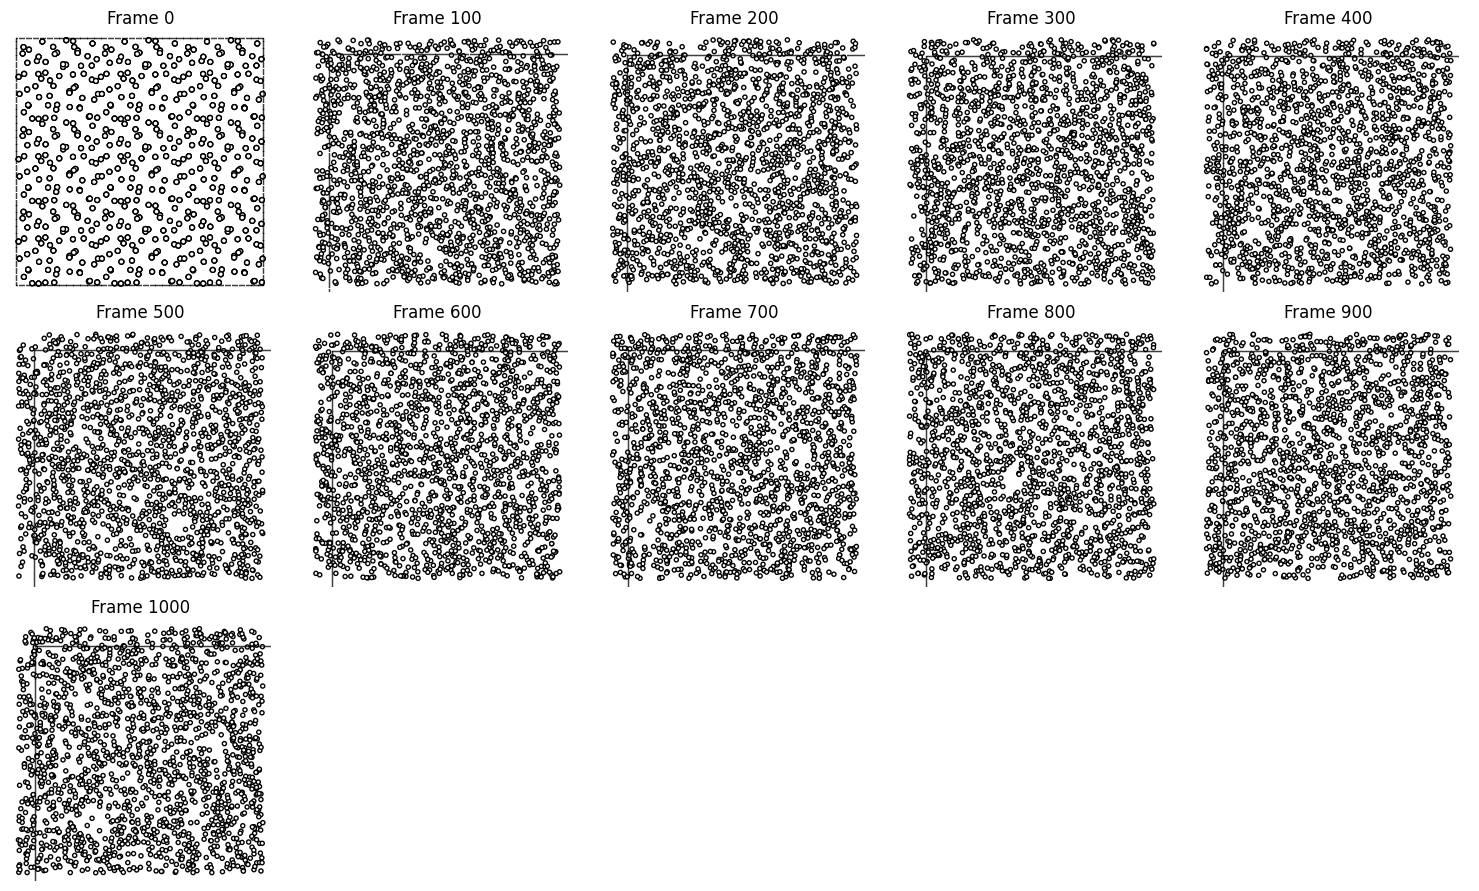

In [7]:
frames = read(file_liquid, index=":", format="lammps-dump-text")

frame_indices = list(range(0, min(len(frames), 1001), 100))

n = len(frame_indices)
cols = 5
rows = (n + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(15, 3 * rows))

for i, idx in enumerate(frame_indices):
    row = i // cols
    col = i % cols
    ax = axes[row, col] if rows > 1 else axes[col]

    atoms = frames[idx]
    plot_atoms(atoms, ax, rotation='90x', show_unit_cell=1)
    ax.set_title(f"Frame {idx}")
    ax.axis('off')

for j in range(i + 1, rows * cols):
    row = j // cols
    col = j % cols
    ax = axes[row, col] if rows > 1 else axes[col]
    ax.axis('off')

plt.tight_layout()
plt.show()

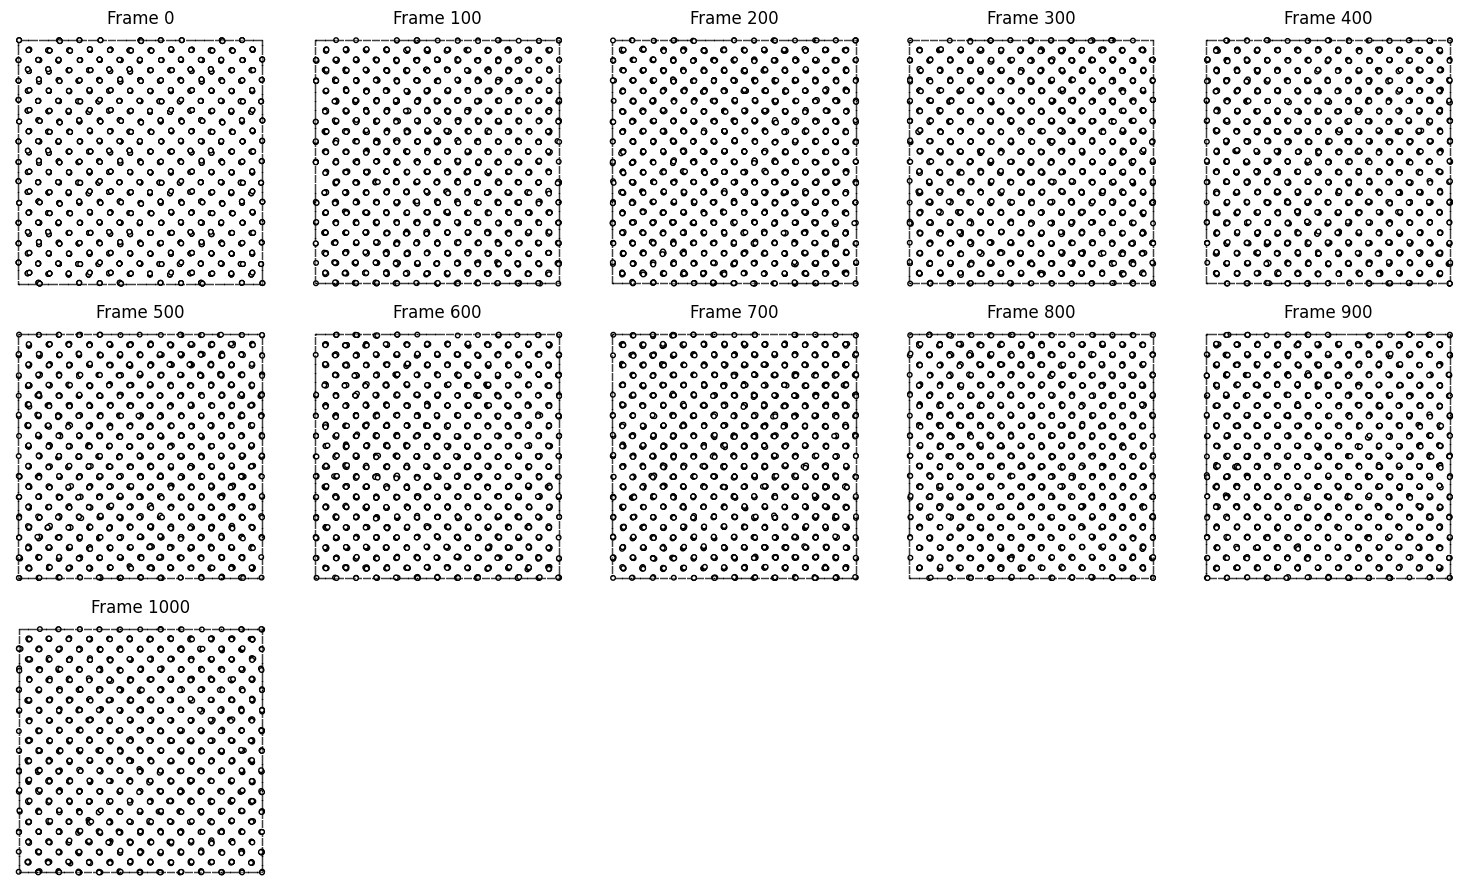

In [8]:
frames = read(file_solid, index=":", format="lammps-dump-text")

frame_indices = list(range(0, min(len(frames), 1001), 100))

n = len(frame_indices)
cols = 5
rows = (n + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(15, 3 * rows))

for i, idx in enumerate(frame_indices):
    row = i // cols
    col = i % cols
    ax = axes[row, col] if rows > 1 else axes[col]

    atoms = frames[idx]
    plot_atoms(atoms, ax, rotation='90x', show_unit_cell=1)
    ax.set_title(f"Frame {idx}")
    ax.axis('off')

for j in range(i + 1, rows * cols):
    row = j // cols
    col = j % cols
    ax = axes[row, col] if rows > 1 else axes[col]
    ax.axis('off')

plt.tight_layout()
plt.show()